# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERNSHIP"

## LGMVIP July-22

#### _Created By - Zecil Jain_

### TASK 3- Music Recommendation System



In this project we will be working with a dataset consisting of information for different genres of music and developing a model to suggest users with different genres based on their listening pattern.

Dataset Link: https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

### Importing Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import string
import math
import missingno as msno

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import lightgbm as lgbm
import xgboost as xgb
import catboost as cb

import warnings
warnings.filterwarnings('ignore')

### Loading the Datasets

For this project, there's a total of 5 different datasets that we need to work with. First we will import and explore them by different visualization plots individually and then we will be merging them into a single dataframe for further preprocessing and model building stages.

In [ ]:
train = pd.read_csv(r'E:\Data-Science-Projects\LGMVIP--DataScience\Task -3\Input\train.csv', nrows = 100000)
test = pd.read_csv(r'E:\Data-Science-Projects\LGMVIP--DataScience\Task -3\Input\test.csv')
songs = pd.read_csv(r'E:\Data-Science-Projects\LGMVIP--DataScience\Task -3\Input\songs.csv')
members = pd.read_csv(r'E:\Data-Science-Projects\LGMVIP--DataScience\Task -3\Input\members.csv')
extra_info = pd.read_csv(r'E:\Data-Science-Projects\LGMVIP--DataScience\Task -3\Input\song_extra_info.csv')

### Dataset Exploration

#### 1. Train Dataset

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
train.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
99995,EedNarOVNUU5ppYW/ho+KV8V29zuf7m3+Df5qnQ9FT4=,c7bvJHblBfQGFJG+DcltwclubmlYvIRTT964Lu4WWXI=,my library,Local playlist more,local-playlist,1
99996,xyxz9lf8ipoxELeDLlazmHVZHE1ZYqE6iwfJWkH3Ojc=,MZTwICqr12ijCeBaWeKVJZ67Bz7NI0WA4bqB1IwR4jI=,my library,Local playlist more,local-library,0
99997,vDi/nHqBu7wb+DtI2Ix4TupWQatUEFR41mDC0c8Voh8=,xK0clTH8TvjG6sKmJXZuMLzhikhlEsolLtx2AHBpmbQ=,my library,Local playlist more,local-library,1
99998,xyxz9lf8ipoxELeDLlazmHVZHE1ZYqE6iwfJWkH3Ojc=,SoPkcfpiBjDpZSNPN3HdbPI8WAkuenayPXyBRK91T2s=,my library,Local playlist more,local-library,0
99999,n8TgRhOBw+DthR6N6ie/63yp3KHA20UVHlbK9nY9nIc=,PEEg0ODi9cPg1VXM9EOhZtV39sBJFr/9cIflhbHJ5Bs=,my library,Local playlist more,local-library,1


In [ ]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
81477,Kf8dmlFp1RT8SqK9GUiBa2Xv5YHtJVLHET2U4WJk8uw=,17NI614y+KVbLs2vQUzx7gw1qWOhH0YmPvtp1yvDkNQ=,my library,Local playlist more,local-library,1
66740,VsSxDiSmMPkgeqVBQ5rxtWZ04nnwD5WNdE8cIL9UgaQ=,TK/Lsn3OPeM755LJblpPipebr7tbvi4e6uy7A/gHozQ=,my library,Local playlist more,local-library,1
51520,n5v6IqRk4CZnELtP0Z2et7EZrdPicfyhvD2gIdq1Mcc=,rwn4vuaBYGXrcj+ivp7R7LyW2TDUAp0jSRvrYH25V7g=,my library,Local playlist more,local-library,1
12317,KP9C2DhtapjZuDpH3VNvtKQlI3LraMhMnkHw470H7XE=,DJL432xqXScrGNT7pOiHYiLMLhB65T6LrzZzWe44gQ0=,my library,Local playlist more,local-library,1
19026,HA5Fo4ulASCusi+puz9cwgHTizZJcX/+rPsZ9VU9hxk=,yHpkzPHLQcZIz1yqaimQMaFpTnug/s0+WcWWDL66fA8=,my library,Local playlist more,local-library,1
82839,yfzcfxwYPQqGFd0/+Aprj9nJHepILlbQFmht1VyPrZU=,MOzBN+IOUuI5CzK9lVfWcUuaqBcWEjLZiCzK1bpY4rM=,my library,Local playlist more,local-library,1
85554,w68Toj7g0IUY86ZAkM1lwFs4O4pxd/zLV//FWgBg+co=,0dOvOPs5qz72whYftTkMHW7MvN2Asu0qaJ2vGX1b/9o=,discover,Discover Genre,online-playlist,1
37595,FO75EcGCLesacLtZe+tEpPsED7L+EGag3JAfmpItYgc=,QZBm8SOwnEjNfCpgsKBBGPMGET6y6XaQgnJiirspW7I=,discover,Discover Chart,online-playlist,1
30143,5mSvXWai4DWZza+zuR00vo5KTjzVRCFJZo+b1PP94jo=,UNjCrSCn/a/2mmQPoHs0ai8oEhg0ILEuTg/mf5ou9Xs=,my library,Local playlist more,local-playlist,1
56304,9hEpZerLwP7cVFER/IjWJCC+kZpXcnDUTZcjAGstxxg=,O5OKk3yVlJUnQVYxauWSOM7ajGeQ3NCzhy1YWZ/xtaE=,my library,Local playlist more,local-library,1


In [ ]:
train.describe()

,target
count,100000.000000
mean,0.750680
std,0.432622
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
train.shape

(100000, 6)

In [ ]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   msno                100000 non-null  object
 1   song_id             100000 non-null  object
 2   source_system_tab   99697 non-null   object
 3   source_screen_name  95727 non-null   object
 4   source_type         99805 non-null   object
 5   target              100000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [ ]:
train.isnull().sum()

msno                     0
song_id                  0
source_system_tab      303
source_screen_name    4273
source_type            195
target                   0
dtype: int64

As we can see here, there's a lot of missing/null values and this creates a requirement to handle the missing data which we will be accomplishing further down the project development process along with missing values from all other imported datasets.

#### 2. Songs Dataset

In [ ]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
songs.tail()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0
2296319,V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=,270466,829,Kim Robertson,NaN,NaN,52.0


In [ ]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
1776521,43tAAhibVZFphTZLtLVLBIncJzm1Y/2HlBp9sTw3l8s=,227694,2022,STRAIGHTENER (ストレイテナー),NaN,NaN,17.0
257810,JoSeJPklpcSonqdLIvi5KfV6LwSMFCMNsdyN9NOvB64=,242694,465,Helene Segara,Marc Nacash| N Godsend,NaN,52.0
1955298,1UBuY8vKad6f5mX7D6lOdeyajjiVmIeBoy9ZBRtpWrs=,251193,2022,กะลา (KALA),NaN,ยุทธพงษ์ แสงสุวรรณ,45.0
1598184,rFK5GIJnN+4+yK2Kx7fL3paJlZHlXRsJzTRSagWC3Lg=,234449,1259,Prozak,NaN,NaN,52.0
1078688,13yeOI+wfeynMT4NABmxHb7B5XmBR7VfAbZtulKYu7c=,257741,465,Ley Chanel,Trystan Matthews| Wael A. Abdel,NaN,52.0
2142501,Cq9HTQqVSy/ZRaDHHkepJAefxpdkXLw73SJgx7a1HX0=,192992,2022,Dolores,NaN,NaN,52.0
1623455,UK9rH0Tc7v8j1rIUAZUfpw5bE+pR78+OkeEhgseAbr4=,235023,940|1152,Sweet Baby Lullaby World,Marco Rinaldo,NaN,-1.0
1265451,zVjq7ViFkpHKHy/xLKnzqP/ORzOme6LGsboEVcIqBFo=,182833,465,Serie 3x4 (Lucho Gatica| Monna Bell| Luis Aguile),Domenico Modugno| Francesco Migliacci,NaN,52.0
1553928,T3XRSwZZ8wdZdpqUPJYf+BJmWwlmIRplh88+eg935+Y=,171676,786,林均,NaN,NaN,-1.0
616009,sxx8pIQG1rt8onulN/l1CxaxuBlbZ0xvvGlAx0XU83g=,171316,958,Gianni Schicchi,NaN,NaN,-1.0


In [ ]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [ ]:
songs.shape

(2296320, 7)

In [ ]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [ ]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

#### 3. Members Dataset

In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
members.tail()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920
34402,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818


In [ ]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
1610,a1MEIuoHI5u4d0qAzMk5zMTDN0mssG5CLbBSpP5k2dQ=,1,0,NaN,7,20160206,20171005
13479,w1yBHYRjMGPoGhpxy51WoyUICHZoP9rwvYjyUBoGGPc=,1,0,NaN,4,20170218,20170221
23019,AGWmTXRxwZaRVdHGTBVZEz+qxv3wYn52Rabw8gs2JuA=,1,0,NaN,4,20170101,20170104
16388,qoa4I4UFS/UERmhwFP7cijzKfHyqCQG0Z0zX95aozzU=,1,0,NaN,7,20160108,20170107
217,D9dD56KuXsMxkWsYw/o1FgNwBopA2KO4qN662hNwKo8=,1,0,NaN,3,20130614,20170127
1801,76L/1dgEBAG6PEeDCYBUSj+Nl9cFthdyrz01A0pgzXE=,4,27,female,7,20110827,20171005
30228,5oRDDnFhBPCwp3Dpoi2dJIv72Z+D3DvEcv0wUCcPFTs=,1,0,NaN,4,20170119,20170122
33050,a57On4b1uZW6uJVbbBfTaEpUaV3GVMfbQn/SRtf6W64=,1,0,NaN,4,20170110,20170113
21791,ttRxS5K1p1glQbToMtjRtufbYFbRek19luxoHQtK0xQ=,1,0,NaN,7,20140315,20170913
30363,GVLu6Eyf7vsDfA+7D4C217ZU3u+SwI26Jke2h+qljUk=,1,0,NaN,7,20170208,20171007


In [ ]:
members.shape

(34403, 7)

In [ ]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [ ]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [ ]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

#### 4. Extra Info Dataset

In [ ]:
extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
extra_info.tail()

,song_id,name,isrc
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095
2295970,DYKJKSgDOKxb19XzOVO81176qTH0OIHCsfzFRm/BG+g=,Like This,US5UL1512426


In [ ]:
extra_info.sample(10)

,song_id,name,isrc
2047847,vsjMPYDLIXuCMoO72uEgEBRpbGoXnilp/1cOyqkjXYo=,Up in the Clouds,PLL431926915
590366,l+FeOcxe8VDeqJY3F5eBd8pSBPQr96aUq+OD+X9nJ3I=,Ouvertüre,CHUM71500489
1307603,TaQ4phFh/Z1SwXgCA6YjAHCM7pD62HHHVkY61uI1hR8=,Little Girl,DEPZ69254448
1326586,P+0pvF6rAhjXY0llQPem6AQ60VngVNF61Mksq9uK16I=,Love Turns 40,USZO10609103
2075988,ayzLINaMYIdl+2fPSeUIbMLh9kIi5GOQoQN8EJhHLa8=,In Oz,GBLFP1659837
432143,hBxej9l7EXGiK0brf15jIg2PMkxZKTuOkC8obhwqGYU=,Who's That Girl? (Acoustic Mix),USHR10421101
286193,JDD6oAiQ4FsGa5MVpfR3mJMf7NZg0ZwcAN4Eh5FoV+w=,野子 (Ye Zi),CNE041500079
853606,ruFFIUQn9CFfBj2wCOEZtrsFHoapPKaHHfquae88cBQ=,Nine Pound Hammer,FR6V81943314
1130568,6tcMiuDHvahTi02VX5jp4zW4tmfUqhw4tfjEz73cSn0=,Take You Away,FR2X41610390
2261701,xnvoHRHfiY6VgH4LtkO4M+V+byPNKd4jXCF8juoHgek=,追風(（Oikaze）),USHM91155880


In [ ]:
extra_info.shape

(2295971, 3)

In [ ]:
extra_info.columns

Index(['song_id', 'name', 'isrc'], dtype='object')

In [ ]:
extra_info.describe()

,song_id,name,isrc
count,2295971,2295969,2159423
unique,2295971,1168979,1806825
top,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,Intro,GBPS81518952
freq,1,1734,207


In [ ]:
extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [ ]:
extra_info.isnull().sum()

song_id         0
name            2
isrc       136548
dtype: int64

# Data Visualization

Now that we have completed finding relevant information from the all the datasets, we will further explore them in-depth by creating plots for all important features in these datasets and find crucial information about the relationships between these features.

### For Train Dataset

First, we will be working with the train dataset. 

Since, there is a common plot, count plot, which will be created for almost all the important features in every dataset, we will be creating a function this and then call that function everytime we need to create a count plot.

In [ ]:
# Function for plotting the count plots
def count_plot(data, x, hue, type):
  plt.figure(figsize = (20, 10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x)
  plt.ylabel('count')
  plt.xticks(rotation = '60')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.legend(loc='best')
  plt.tight_layout();

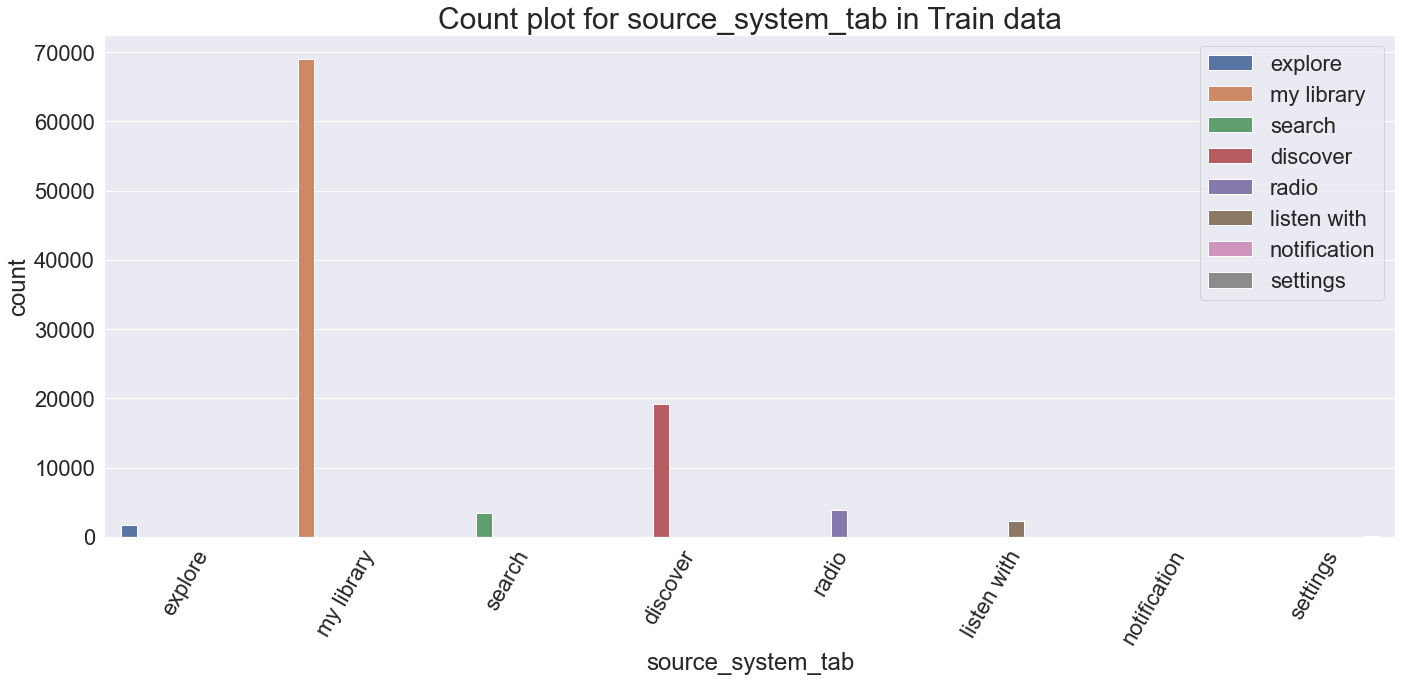

In [ ]:
count_plot(train,'source_system_tab','source_system_tab','Train')

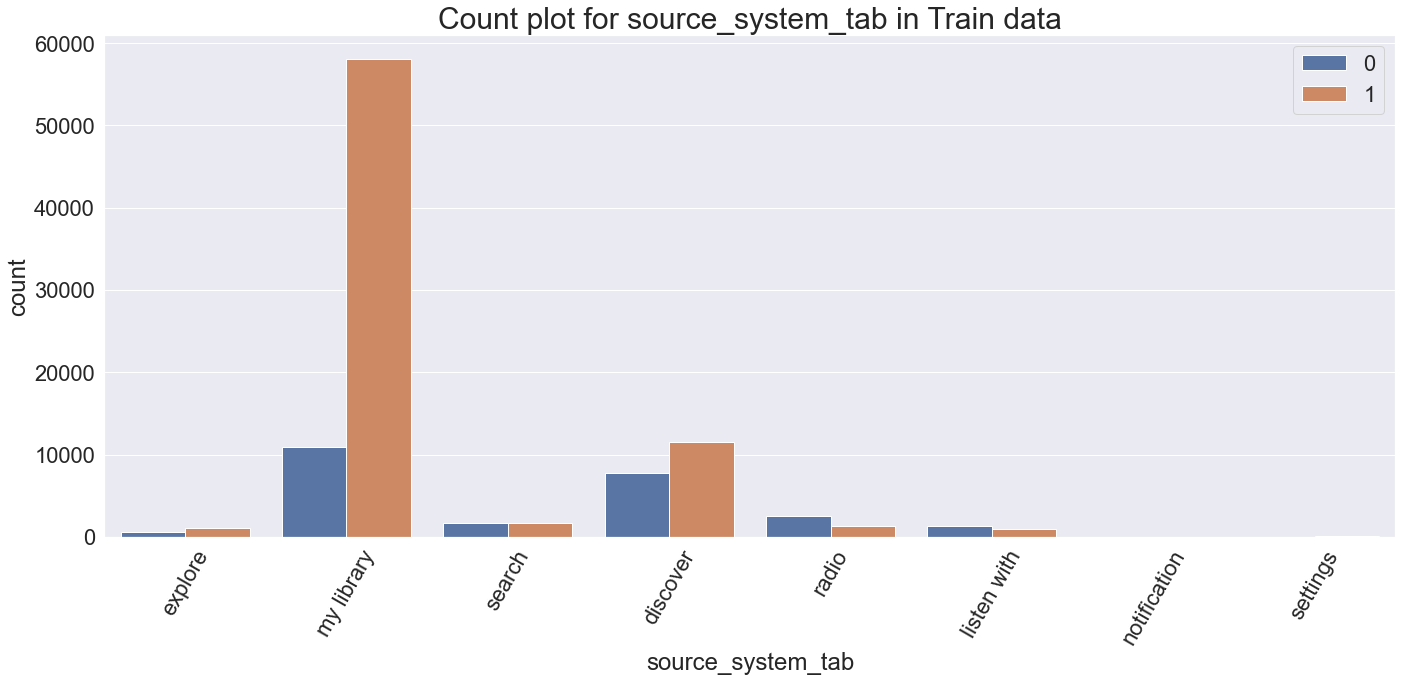

In [ ]:
count_plot(train, 'source_system_tab', 'target', 'Train')

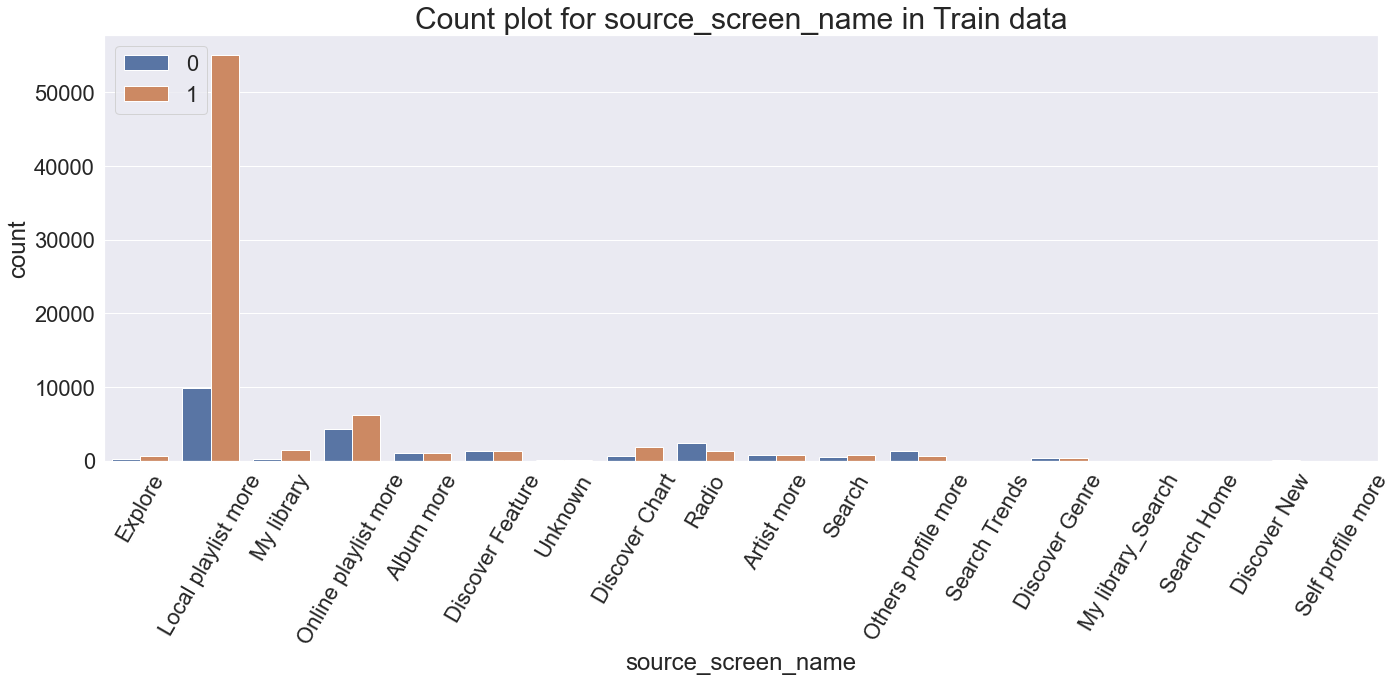

In [ ]:
count_plot(train, 'source_screen_name', 'target', 'Train')

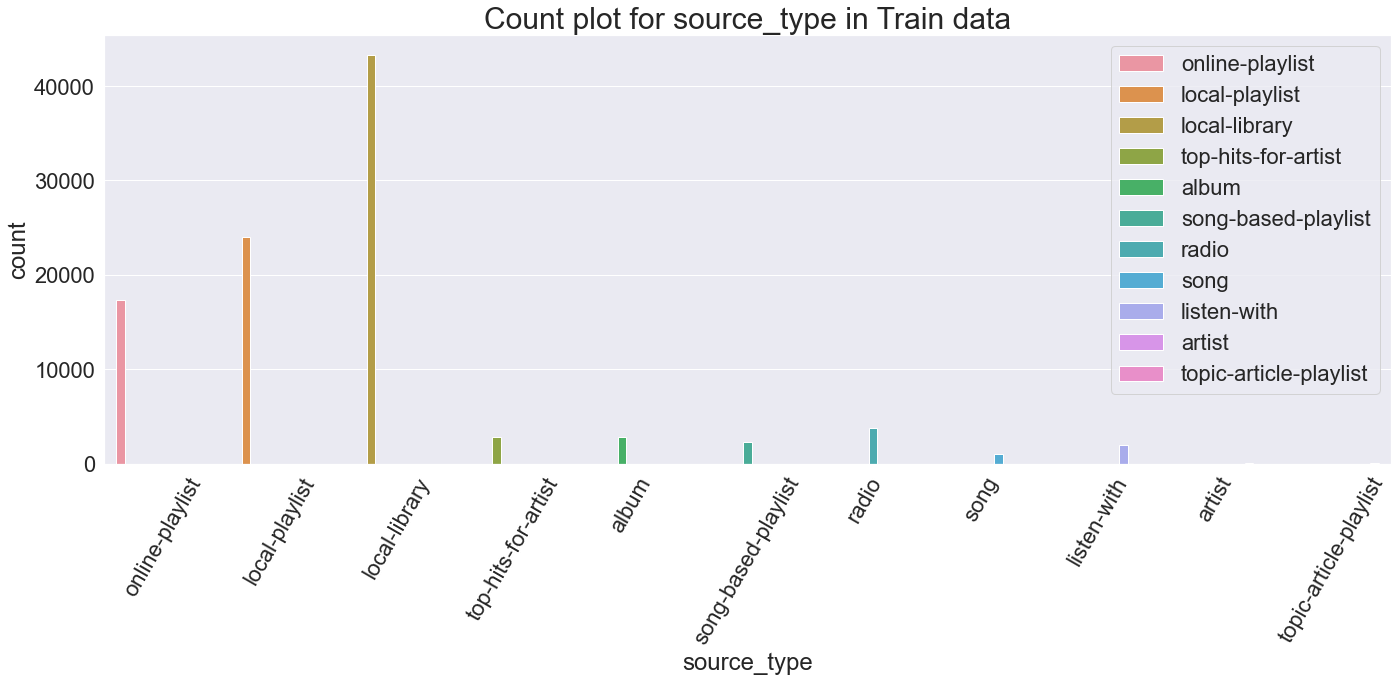

In [ ]:
count_plot(train, 'source_type', 'source_type', 'Train')

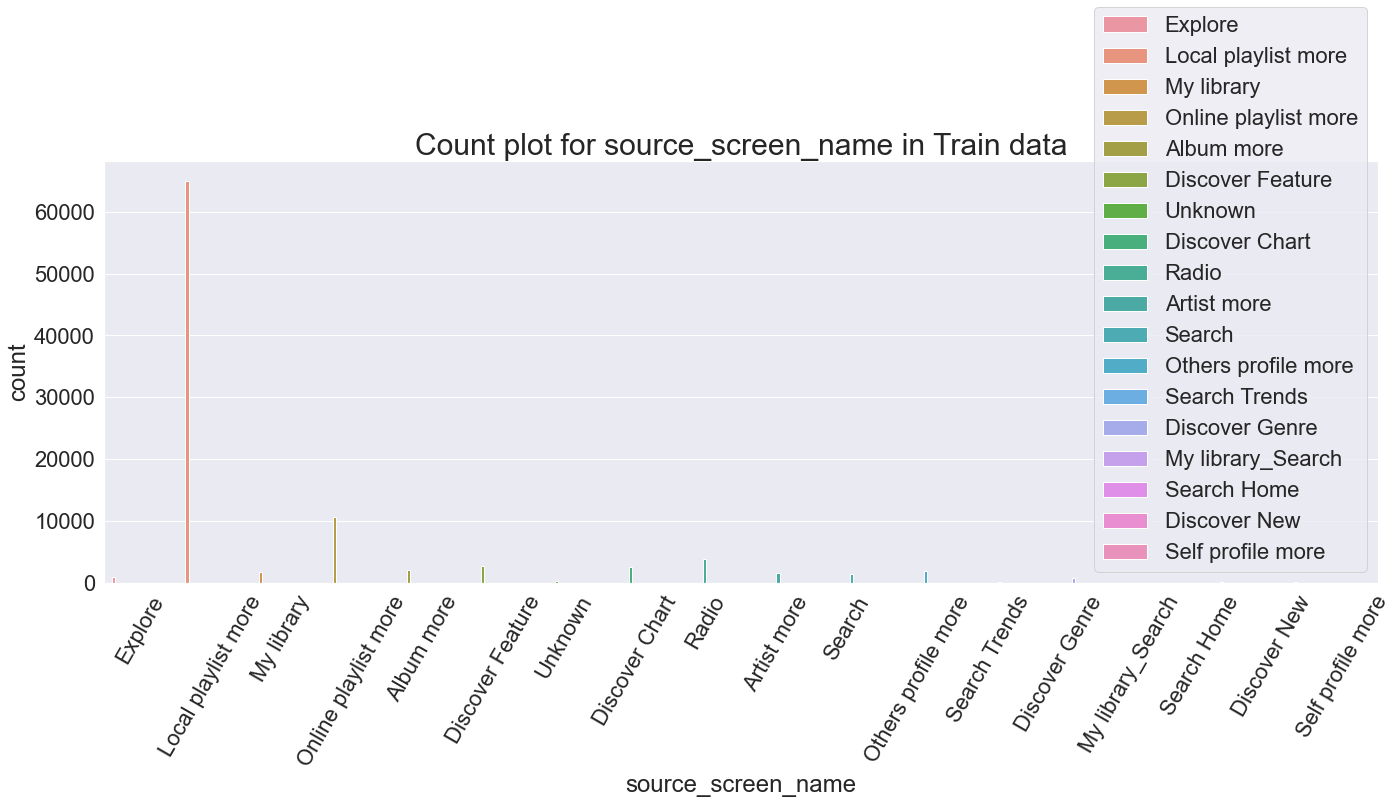

In [ ]:
count_plot(train, 'source_screen_name', 'source_screen_name', 'Train')

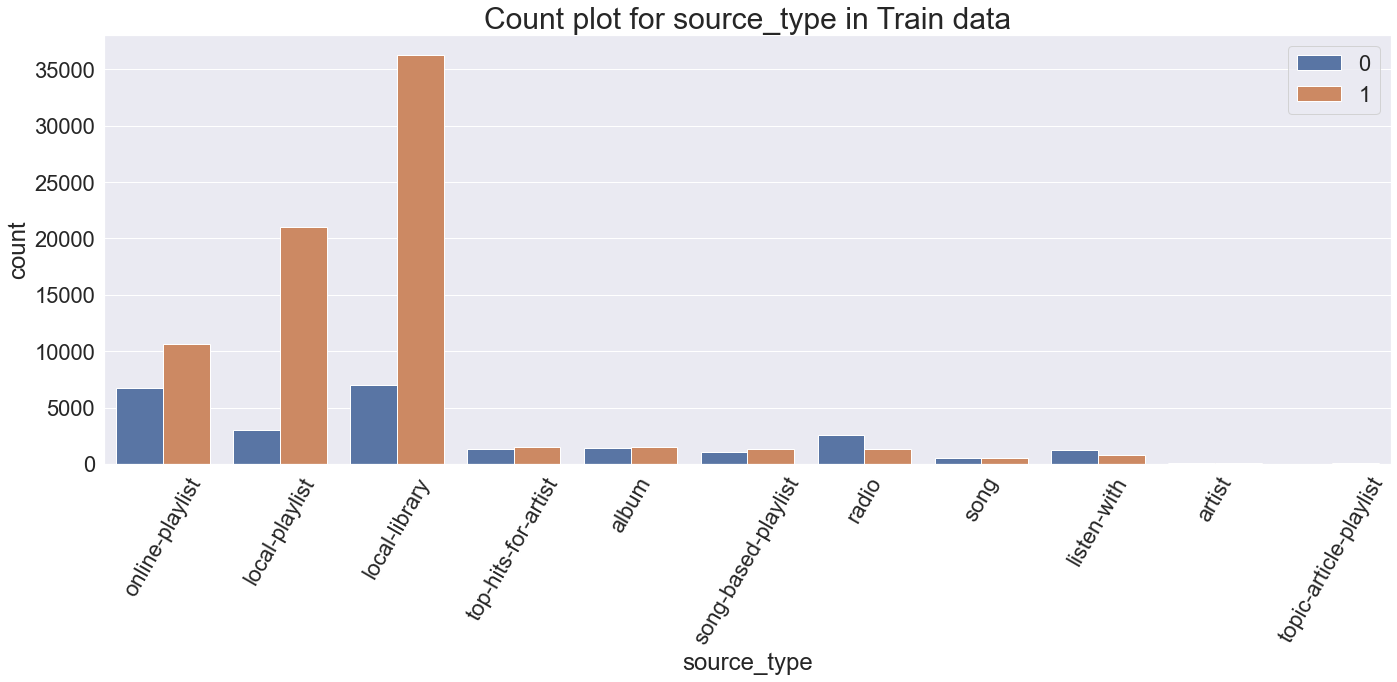

In [ ]:
count_plot(train, 'source_type', 'target', 'Train')

From the above plots we can determine the following:
- Local library/my library is the most used source for listening to music
- Explore feature is the most used amongst all on-screen features. 

### For Members Dataset

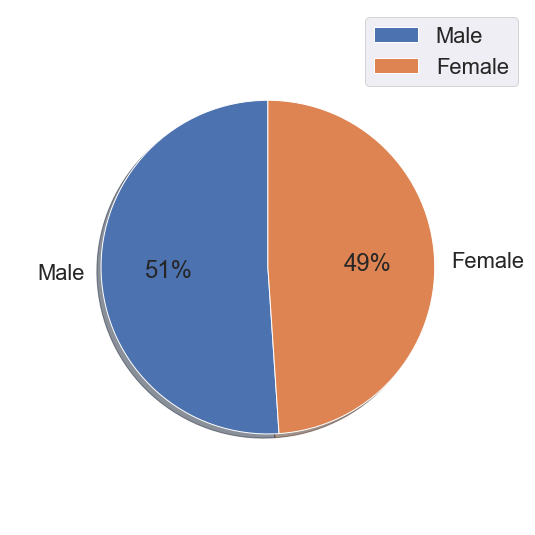

In [ ]:
labels = ['Male','Female']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
plt.pie(sizes, 
        labels=labels, 
        autopct='%.0f%%',
        shadow=True, 
        radius=.8,
        startangle=90)
plt.legend(loc='best')
plt.tight_layout();

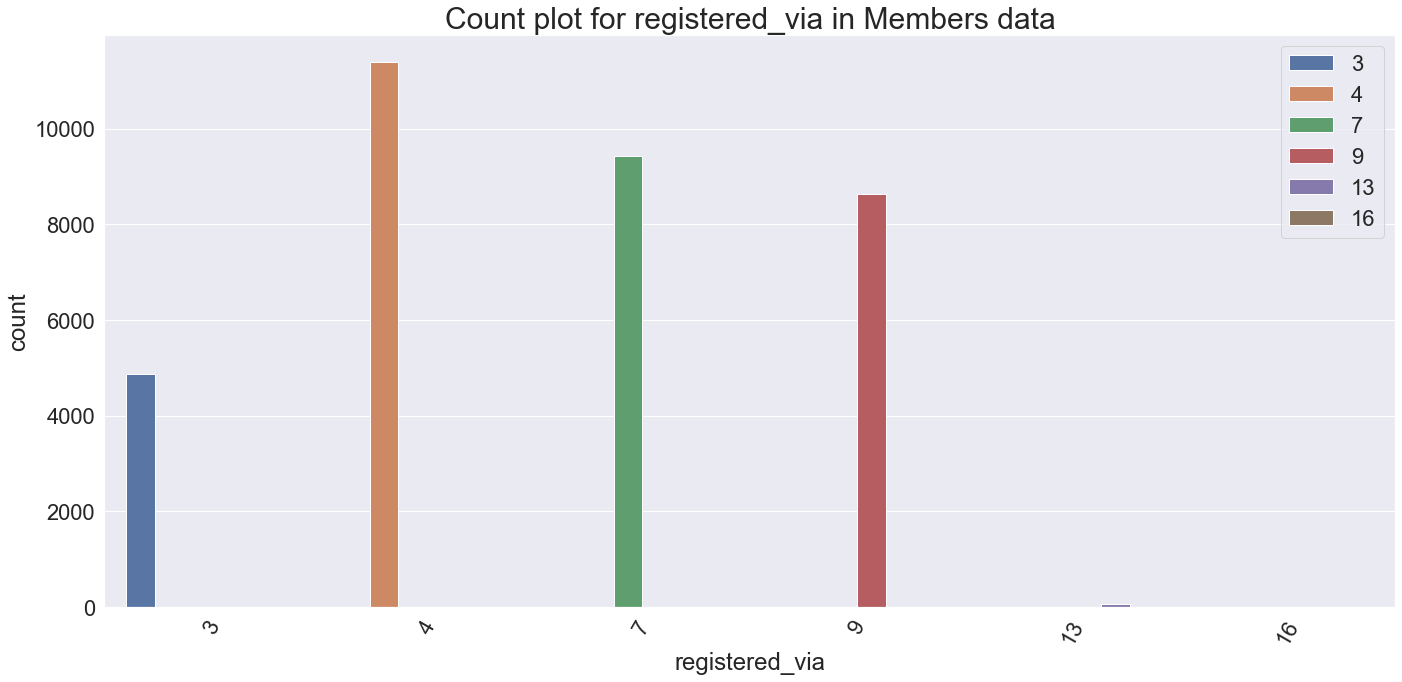

In [ ]:
count_plot(members,'registered_via','registered_via', 'Members')

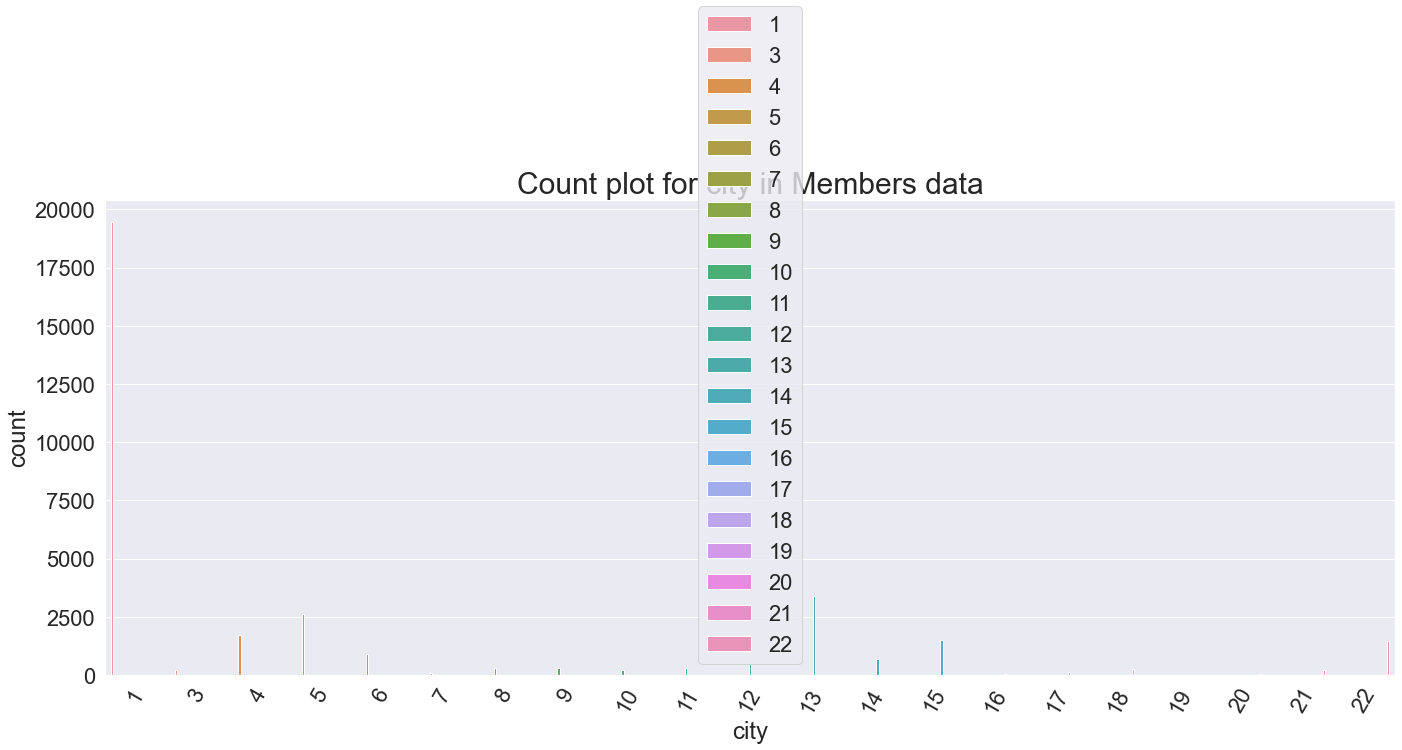

In [ ]:
count_plot(members, 'city', 'city', 'Members')

From the above plots we can determine that male gender are the majority listeners amongst all genders.

### For Songs Dataset

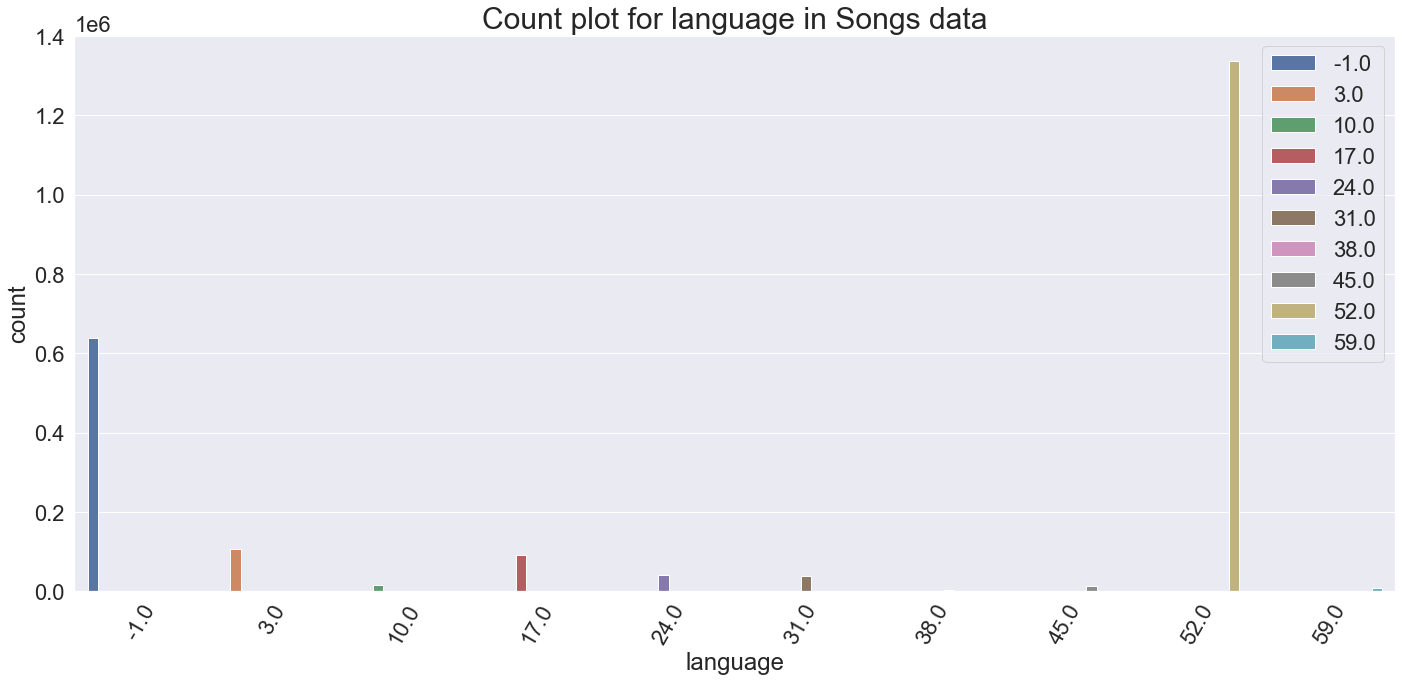

In [ ]:
count_plot(songs, 'language','language', 'Songs')

## Data Preprocessing

After exploring our datasets, we will be moving onto the data preprocessing part where all the data cleaning and preparing procedure will take place.

In [ ]:
t_s_merged = pd.merge(train, songs, on='song_id', how='left')
t_s_e_merged = pd.merge(t_s_merged, extra_info, on='song_id', how='left')
all_merged = pd.merge(t_s_e_merged, members, on='msno', how='left')

As we can see in the above code block, 'all_merged' is the final dataframe which contain data from all the individual datasets. We will be working only with this complete dataset and all other can either be deleted or simply ignored.

In [ ]:
all_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


In [ ]:
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    100000 non-null  object 
 1   song_id                 100000 non-null  object 
 2   source_system_tab       99697 non-null   object 
 3   source_screen_name      95727 non-null   object 
 4   source_type             99805 non-null   object 
 5   target                  100000 non-null  int64  
 6   song_length             99996 non-null   float64
 7   genre_ids               98498 non-null   object 
 8   artist_name             99996 non-null   object 
 9   composer                78528 non-null   object 
 10  lyricist                59309 non-null   object 
 11  language                99996 non-null   float64
 12  name                    99991 non-null   object 
 13  isrc                    91475 non-null   object 
 14  city                 

In [ ]:
all_merged.isnull().sum()

msno                          0
song_id                       0
source_system_tab           303
source_screen_name         4273
source_type                 195
target                        0
song_length                   4
genre_ids                  1502
artist_name                   4
composer                  21472
lyricist                  40691
language                      4
name                          9
isrc                       8525
city                          0
bd                            0
gender                    38672
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

### Dealing with missing values

Since there's a dearth of missing values in most of the features, we will be filling them with valid entries (in this case - '0') for accurate predictions.

<AxesSubplot:>

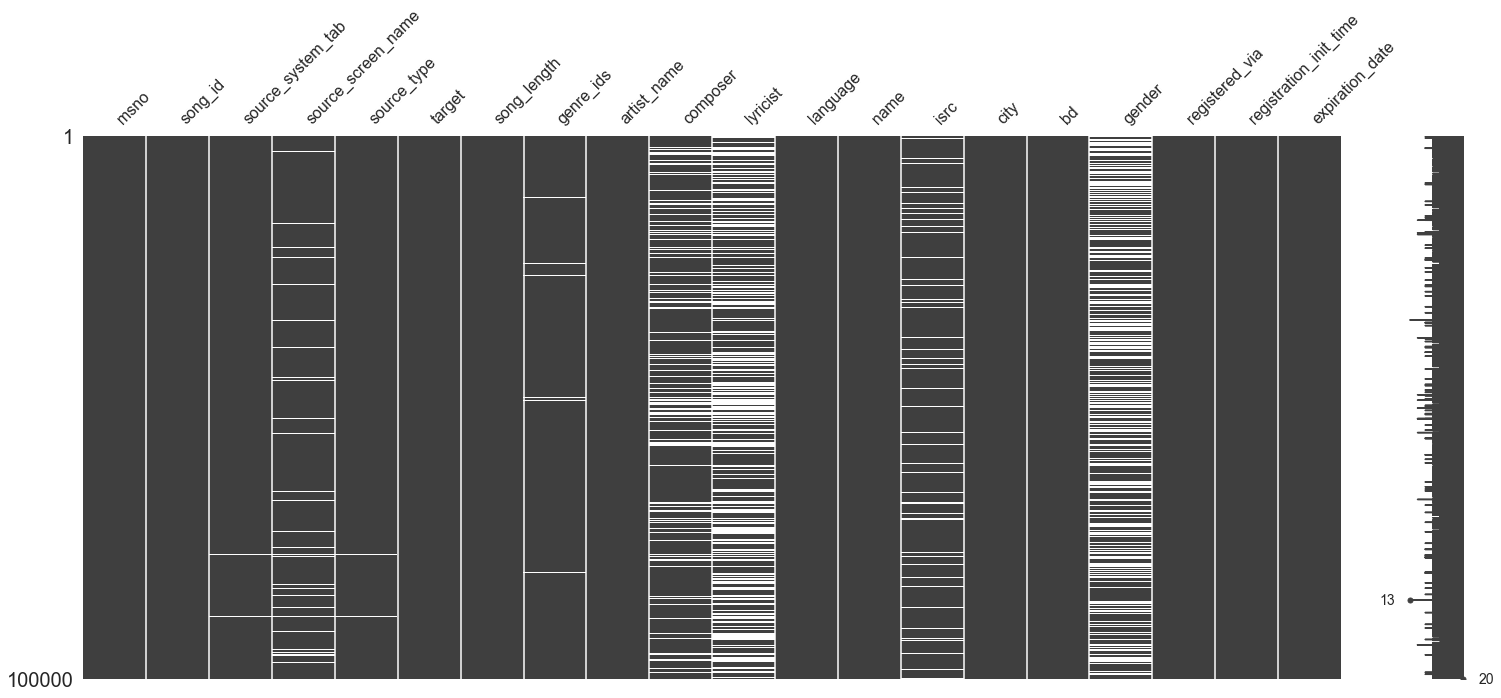

In [ ]:
msno.matrix(all_merged)

In the above plot we can clearly see that lyricist and gender are two features having the most number of null values and hence we can't consider them for our model building.

Next we will be filling all the values having datatype - object with 0.

In [ ]:
for i in songs.select_dtypes(include=['object']).columns:
    songs[i][songs[i].isnull()] = 'unknown'
songs = songs.fillna(value=0)

#### New feature extraction

We are given the registeration and expiration dates in a format of day/month/year. But we need these day, month and year values separately for a better processing of data, so we will we creating 6 new features for the same with individual values extracted from the dataset for these features.

In [ ]:
all_merged.registration_init_time = pd.to_datetime(all_merged.registration_init_time, format='%Y%m%d', errors='ignore')
all_merged['registration_init_time_year'] = all_merged['registration_init_time'].dt.year
all_merged['registration_init_time_month'] = all_merged['registration_init_time'].dt.month
all_merged['registration_init_time_day'] = all_merged['registration_init_time'].dt.day

all_merged.expiration_date = pd.to_datetime(all_merged.expiration_date,  format='%Y%m%d', errors='ignore')
all_merged['expiration_date_year'] = all_merged['expiration_date'].dt.year
all_merged['expiration_date_month'] = all_merged['expiration_date'].dt.month
all_merged['expiration_date_day'] = all_merged['expiration_date'].dt.day

In [ ]:
all_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,...,NaN,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,NaN,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5


Next step is encoding the data. We will be using Label encoder for this purpose and encoding all columns present in the dataset.

In [ ]:
label_encoder = LabelEncoder()

for i in all_merged.columns:
    all_merged[i] = label_encoder.fit_transform(all_merged[i])

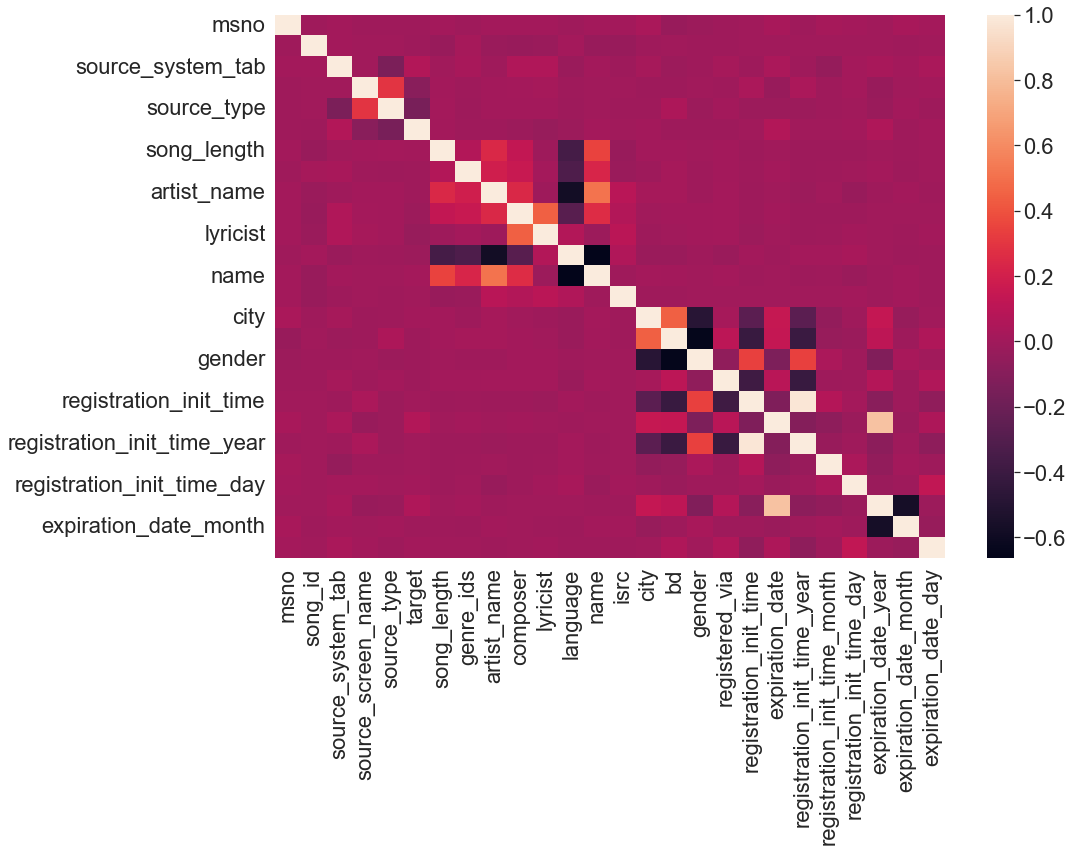

In [ ]:
plt.figure(figsize=[15,10])
sns.heatmap(all_merged.corr())
plt.show();

The correlation heatmap show that there's not much correlation between the important features of the dataset and hence there's no need to drop any columns before model building in order to maintain prediction accuracy.

## Model Building

Next part is the model building, we will be splitting the dataset into train and test/evaluation splits using the train_test_split function.
Our target vector for this model will be the "target" column itself.

In [ ]:
X = all_merged.drop('target', axis=1)
y = all_merged.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

Since we don't know which model will be best suited for this dataset to make predictions with greatest accuracy yet. We will be choosing a set of models suitable for such types of problems and testing out our dataset with each one of them to see which model gives out the best results.

Since this a classification problem, the models chosen for this purpose are:
- Random Forest Classifier
- Extra Trees Classifier
- LightGBM Classifier
- XGBoost Classifier
- CatBoost Classifier

In [ ]:
def model_with(model_name, X_train, X_val, y_train, y_val) :
    print("---------------------------------------------->")
    print("Training with :", model_name)
    print()
        
    if model_name == "Random Forest Classifier" :
        model = RandomForestClassifier(
            n_estimators=1000, 
        )
    elif model_name == "Extra Trees Classifier" :
        model = ExtraTreesClassifier(
            n_estimators=1000, 
        )
    elif model_name == "LightGBM Classifier" :
        model = lgbm.LGBMClassifier(
            n_estimators=1000, 
        )
    elif model_name == "XGBoost Classifier" :
        model = xgb.XGBClassifier(
            n_estimators=1000, 
        )
    elif model_name == "CatBoost Classifier" :
        model = cb.CatBoostClassifier(
            n_estimators=1000, 
            verbose=0
        )
    else :
        print("Model to be trained with not found.")
        
    model.fit(X_train, y_train)
    
    val_pred = model.predict(X_val)
    print(classification_report(y_val, val_pred))
    print()
    print("Accuracy :", accuracy_score(y_val, val_pred))
    print("ROC :", roc_auc_score(y_val, val_pred))
    
    print("-------------------------------------------->")
    print()

While training of each model, we will be finding the accuracy and ROC value for each model to determine which model works best for us.

In [ ]:
models = ['Random Forest Classifier', 'Extra Trees Classifier', 'LightGBM Classifier', 'XGBoost Classifier', 'CatBoost Classifier']

for i in models:
    model_with(i, X_train, X_val, y_train, y_val)

---------------------------------------------->
Training with : Random Forest Classifier

              precision    recall  f1-score   support

           0       0.76      0.56      0.65      6240
           1       0.87      0.94      0.90     18760

    accuracy                           0.85     25000
   macro avg       0.82      0.75      0.78     25000
weighted avg       0.84      0.85      0.84     25000


Accuracy : 0.84788
ROC : 0.7530797250013668
-------------------------------------------->

---------------------------------------------->
Training with : Extra Trees Classifier

              precision    recall  f1-score   support

           0       0.75      0.60      0.66      6240
           1       0.87      0.93      0.90     18760

    accuracy                           0.85     25000
   macro avg       0.81      0.76      0.78     25000
weighted avg       0.84      0.85      0.84     25000


Accuracy : 0.8486
ROC : 0.7641476682521459
--------------------------------

After running the above simulations for multiple times, we found out that Random Forest and Extra Trees Classifiers were giving out the best possible accuracies. So we will choose both of them for final model building and train the models with a few extra sets of parameters to get even better outcomes if possible!

### Random Forest and Weights

In [ ]:
rand_f = RandomForestClassifier(
            n_estimators=1000,
            class_weight={0:1,1:2.9987204094}
)

rand_f.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2.9987204094}, n_estimators=1000)

In [ ]:
prediction = rand_f.predict(X_val)
print('Accuracy :', accuracy_score(y_val, prediction))

Accuracy : 0.84788


### Extra Trees Classifier

In [ ]:
et = ExtraTreesClassifier(n_estimators=1000, n_jobs=-1)
et.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=1000, n_jobs=-1)

In [ ]:
pred_et = et.predict(X_val)
print('Accuracy :', accuracy_score(y_val, pred_et))

Accuracy : 0.84748


We can clearly see from the above results of both models that Random Forest has a slight edge over Extra Trees Classifier when given class weights argument to balance the uneven distribution amongst the dataset. 

Hence we conclude that Random Forest Classifier is the best suited model for this project and the result above clearly supports this conclusion.